# Exploratory Data Analysis on Cancer survival with Haberman Dataset.

In [159]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

#load the dataset
haber = pd.read_csv('haberman.csv')

## 1.High level statistics

In [140]:
#No of points and features
haber.shape

(306, 4)

In [141]:
#Snippet of the dataset
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Attribute information:-

* age: Age of patient at time of operation (numerical).
* year: Patient's year of operation (year - 1900, numerical).
* nodes: Number of positive axillary nodes detected (numerical).
* status: Survival status, 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year.

In [142]:
#Data points in each class
haber['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [96]:
#Basic summary of the dataset
haber.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations:
* The age of the patients vary from 30 to 83 with the median of 52.
* The maximum number of positive axillary nodes observed is 52, nearly 75% of the patients have less than 5 positive axillary  nodes and nearly 25% of the patients have no positive axillary nodes. 
* The dataset contains only a small number of records (306). 
* The dataset is imbalanced as target column(status) has 73% of values belong to class '1'.

## 2.Objective
* To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive axillary nodes.

## 3.Univariate Analysis

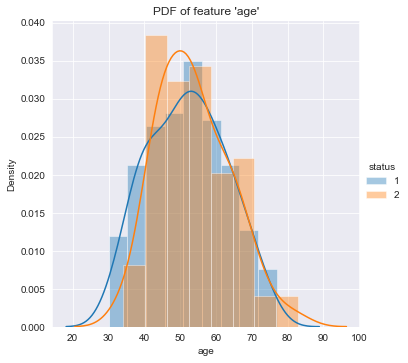

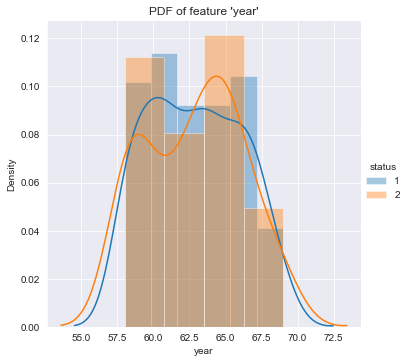

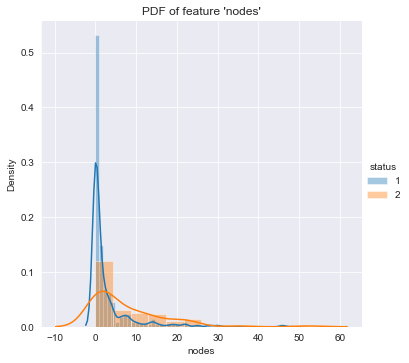

In [158]:
#3.1 PDF
"""
Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram).
"""
#age
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "age")\
   .add_legend()
plt.title("PDF of feature 'age'")
plt.ylabel("Density")
plt.show()

# year
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title("PDF of feature 'year'")
plt.ylabel("Density")
plt.show()

# nodes
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title("PDF of feature 'nodes'")
plt.ylabel("Density")
plt.show()

### Observations:-
* The number of positive axillary nodes of the survivors is highly densed from 0 to 5.

*****age******
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


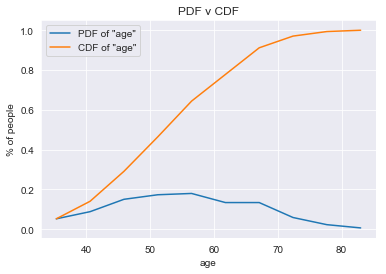

*****year******
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


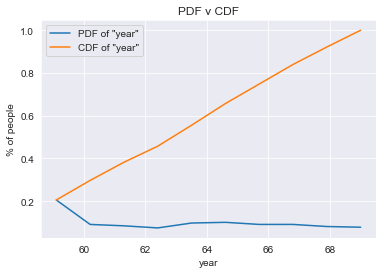

*****nodes******
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


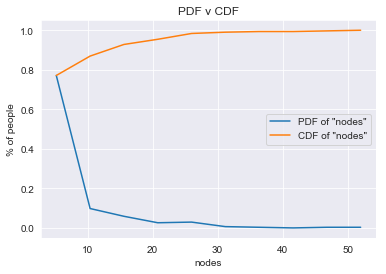

In [157]:
#3.2 CDF
"""
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
"""
# age
counts, bin_edges = np.histogram(haber['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("*****age******")
print("Bin Edges: {}".format(bin_edges))
print("PDF: {}".format(pdf));
print("CDF: {}".format(cdf))
plt.plot(bin_edges[1:],pdf,label='PDF of "age"')
plt.plot(bin_edges[1:], cdf,label='CDF of "age"')
plt.legend(loc=0)
plt.title("PDF v CDF")
plt.xlabel('age')
plt.ylabel('% of people')
plt.show()

# year of treatment
counts, bin_edges = np.histogram(haber['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("*****year******")
print("Bin Edges: {}".format(bin_edges))
print("PDF: {}".format(pdf));
print("CDF: {}".format(cdf))
plt.plot(bin_edges[1:],pdf,label='PDF of "year"')
plt.plot(bin_edges[1:], cdf,label='CDF of "year"')
plt.legend(loc=0)
plt.title("PDF v CDF")
plt.xlabel('year')
plt.ylabel('% of people')
plt.show()

# nodes
counts, bin_edges = np.histogram(haber['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("*****nodes******")
print("Bin Edges: {}".format(bin_edges))
print("PDF: {}".format(pdf));
print("CDF: {}".format(cdf))
plt.plot(bin_edges[1:],pdf,label='PDF of "nodes"')
plt.plot(bin_edges[1:], cdf,label='CDF of "nodes"')
plt.legend(loc=0)
plt.title("PDF v CDF")
plt.xlabel('nodes')
plt.ylabel('% of people')
plt.show()

### Observations:-
* Almost 80% of the patients have less than or equal to 5 positive axillary nodes.

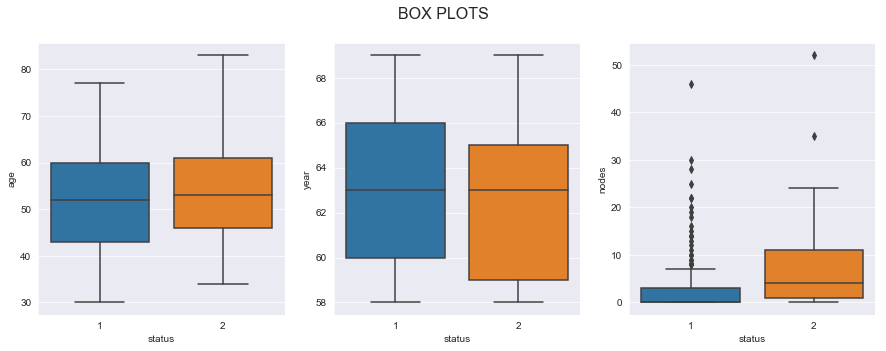

In [156]:
#3.3 Box Plots
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
fig ,axis = plt.subplots(1,3,figsize=(15,5))
sns.set_style("darkgrid")
fig.suptitle('BOX PLOTS', size=16)
#age
sns.boxplot(x="status", y="age", data=haber, ax=axis[0])
#plt.legend(handles)

#year
sns.boxplot(x="status", y="year", data=haber, ax=axis[1])

#nodes
sns.boxplot(x="status", y="nodes", data=haber, ax=axis[2])

plt.show()

### Observations:-
* The patients treated after 1965 have slighlty higher chance to surive than the rest. The patients treated before 1960 have a slighlty lower chance to surive than the rest.

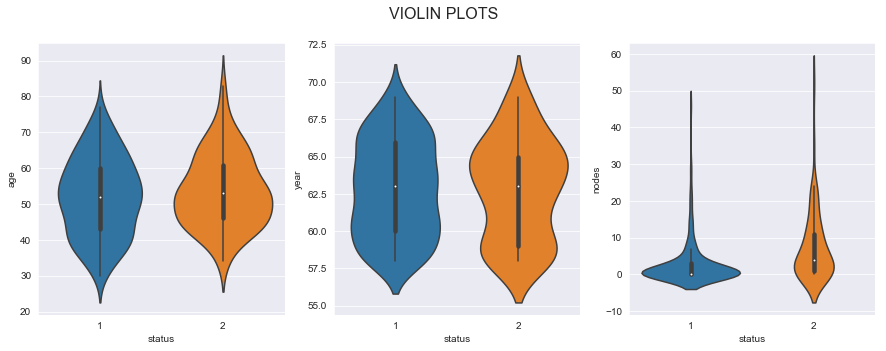

In [155]:
#3.4 Violin Plots
"""
Violin plot is the combination of box plot and probability density function.
"""
fig ,axis = plt.subplots(1,3,figsize=(15,5))
sns.set_style("darkgrid")
fig.suptitle('VIOLIN PLOTS', size=16)

#age
sns.violinplot(x="status", y="age", data=haber, ax=axis[0])

#year
sns.violinplot(x="status", y="year", data=haber, ax=axis[1])

#nodes
sns.violinplot(x="status", y="nodes", data=haber, ax=axis[2])

plt.show()

### Observations:-
* The average age of people who survived 5 years after the treatment and those who didn't is roughly the same(52 years approx.). Which indicates only age can't be considered as a crucial feature for determining the survival status of the patient.

##  4.Bi-variate Analysis

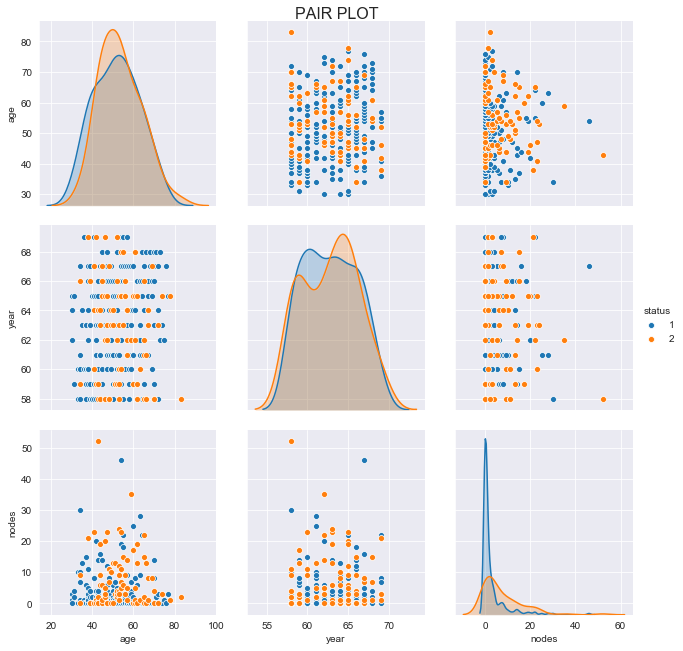

In [148]:
#pair plot

sns.set_style("darkgrid")
sns.pairplot(haber, hue="status",vars=["age", "year", "nodes"], height=3)
plt.suptitle("PAIR PLOT",size=16,y=1)
plt.show()

### Observations :-
* By scattering the data points between "year" and "nodes", we can see the better seperation between the two clases than other scatter plots.